SVM or Support Vector Machine is a linear model for classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.



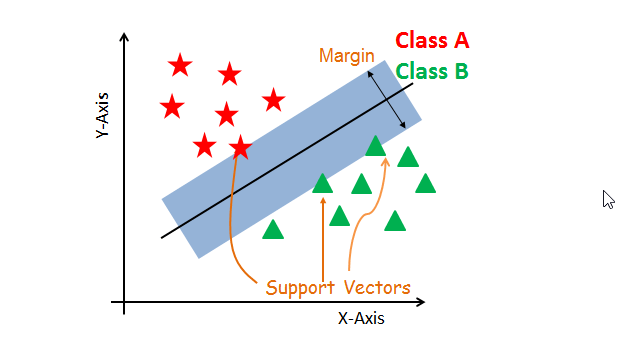

* Support Vectors

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

* Hyperplane

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

The hyperplane with maximum margin is called the optimal hyperplane.

The dimensions of the hyperplane depend on the features present in the dataset, which means if there are 2 features , then hyperplane will be a straight line. And if there are 3 features, then hyperplane will be a 2-dimension plane.

* Margin

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

### SVM Kernels
The SVM algorithm is implemented in practice using a kernel. Kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

Kernel methods in SVMs are a powerful technique for solving classification and regression problems, and they are widely used in machine learning because they can handle complex data structures and are robust to noise and outliers.

* Linear Kernel : A linear kernel can be used as normal dot product any two given observations.
* Polynomial Kernel : A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
* Radial Basis Function Kernel : The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.


#get data

In [1]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/emails.csv

--2024-05-10 08:58:18--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/emails.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31243156 (30M) [text/plain]
Saving to: ‘emails.csv’

emails.csv          100%[===================>]  29.79M  --.-KB/s    in 0.1s    

2024-05-10 08:58:18 (243 MB/s) - ‘emails.csv’ saved [31243156/31243156]



# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

# Load Data

In [3]:
dataset=pd.read_csv('emails.csv')
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
dataset.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [5]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction


In [6]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

In [7]:
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 1 categorical variables : 
 ['Email No.']


In [8]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(dataset[var].unique()), ' labels')

Email No.  contains  5172  labels


In [9]:
# view summary statistics in numerical variables to check for outliers
print(round(dataset[numerical].describe()),2)

          the      to     ect     and     for      of       a     you     hou  \
count  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0   
mean      7.0     6.0     5.0     3.0     3.0     3.0    56.0     2.0     2.0   
std      12.0    10.0    14.0     6.0     5.0     6.0    88.0     4.0     7.0   
min       0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     1.0     1.0     0.0     1.0     0.0    12.0     0.0     0.0   
50%       3.0     3.0     1.0     1.0     2.0     1.0    28.0     1.0     0.0   
75%       8.0     7.0     4.0     3.0     4.0     2.0    62.0     3.0     1.0   
max     210.0   132.0   344.0    89.0    47.0    77.0  1898.0    70.0   167.0   

           in  ...  connevey     jay  valued     lay  infrastructure  \
count  5172.0  ...    5172.0  5172.0  5172.0  5172.0          5172.0   
mean     11.0  ...       0.0     0.0     0.0     0.0             0.0   
std      19.0  ...       0.0     0.0     0.0     1.0  

# Data Preprocessing

In [10]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1
# from sklearn.preprocessing import LabelEncoder
# dataset['Email No.']= LabelEncoder().fit_transform(dataset['Email No.'])
# dataset.head()

In [11]:
y = dataset['Prediction']
x = dataset.drop(['Prediction','Email No.'], axis=1)  #The column 'Email No.' doesn't hold any relevant data.

In [12]:
print(x.head())

   the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  connevey  \
0    0   0    1    0    0   0    2    0    0   0  ...             0         0   
1    8  13   24    6    6   2  102    1   27  18  ...             0         0   
2    0   0    1    0    0   0    8    0    0   4  ...             0         0   
3    0   5   22    0    5   1   51    2   10   1  ...             0         0   
4    7   6   17    1    5   2   57    0    9   3  ...             0         0   

   jay  valued  lay  infrastructure  military  allowing  ff  dry  
0    0       0    0               0         0         0   0    0  
1    0       0    0               0         0         0   1    0  
2    0       0    0               0         0         0   0    0  
3    0       0    0               0         0         0   0    0  
4    0       0    0               0         0         0   1    0  

[5 rows x 3000 columns]


In [13]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64


# Splitting the dataset into training and test set  

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state


In [15]:
print(x_train.head())

      the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
3459    5   4    1    2    2   3   27    7    0   8  ...             0   
1385    3   6    4    6    0   2   57    2    0  23  ...             0   
1380    1   0    1    0    0   1    8    0    0   5  ...             0   
4462   37  16    5   22    5  19  228    6    2  57  ...             0   
3840    2   1    1    0    2   0   10    0    0   0  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
3459         0    0       0    0               0         0         0   0    0  
1385         0    0       0    0               0         0         0   1    0  
1380         0    0       0    0               0         0         0   0    0  
4462         0    0       0    2               0         0         0   1    0  
3840         0    0       0    0               0         0         0   0    0  

[5 rows x 3000 columns]


In [16]:
print(x_test.head())

      the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
3324   14   7    2    2    2   4   37    0    1   9  ...             0   
15      6   2    1    0    2   0   36    3    1   8  ...             0   
4950   40   6    4    6    5  11  130    3    0  31  ...             0   
3964   42  19    1    8    7   7  214    1    3  52  ...             0   
2315    8  14    8    3    3   0   87    0    4  10  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
3324         0    0       0    0               0         0         0   0    0  
15           0    0       0    0               0         0         0   0    0  
4950         0    0       0    0               0         0         0   1    0  
3964         0    0       0    1               0         4         0   3    0  
2315         0    0       0    0               0         0         0   5    0  

[5 rows x 3000 columns]


In [17]:
print(y_train[:10])

3459    1
1385    0
1380    0
4462    1
3840    0
1452    1
2849    0
3145    0
1271    0
1021    0
Name: Prediction, dtype: int64


In [18]:
print(y_test[:10])

3324    0
15      0
4950    0
3964    1
2315    0
861     1
2350    0
1767    0
965     0
2630    1
Name: Prediction, dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train) # apply on whole x data
x_test=scaler.transform(x_test)

# Build Model

In [20]:
from sklearn.svm import SVC
svr_lin = SVC(kernel='linear', C=100, gamma='auto')
svr_lin.fit(x_train,y_train)
y_pred_lin= svr_lin.predict(x_test)

In [21]:
svr_rbf = SVC(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(x_train,y_train)
y_pred_rbf= svr_rbf.predict(x_test)

In [22]:
# poly kernel type to be used in the algorithm
svr_poly = SVC(kernel='poly', C=100, gamma='auto', degree=3,  coef0=1)
svr_poly.fit(x_train,y_train)
y_pred_poly= svr_poly.predict(x_test)

In [23]:
# sigmoid kernel type to be used in the algorithm
svr_sig = SVC(kernel='sigmoid', C=1, gamma='auto',  coef0=1)
svr_sig.fit(x_train,y_train)
y_pred_sig= svr_sig.predict(x_test)

# Evaluate Model

In [24]:
# Evaluate linear model

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score
cm = confusion_matrix(y_test,y_pred_lin)
print(cm)

[[1054   57]
 [  38  403]]


In [26]:
cr = classification_report(y_test,y_pred_lin)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1111
           1       0.88      0.91      0.89       441

    accuracy                           0.94      1552
   macro avg       0.92      0.93      0.93      1552
weighted avg       0.94      0.94      0.94      1552



In [27]:
accuracy_score(y_test,y_pred_lin)

0.9387886597938144

In [28]:
average_precision_score(y_test,y_pred_lin)

0.8250810065547212

In [ ]:
# Evaluate rbf model

In [29]:
cm = confusion_matrix(y_test,y_pred_rbf)
print(cm)

[[1108    3]
 [ 413   28]]


In [30]:
cr = classification_report(y_test,y_pred_rbf)
print(cr)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1111
           1       0.90      0.06      0.12       441

    accuracy                           0.73      1552
   macro avg       0.82      0.53      0.48      1552
weighted avg       0.78      0.73      0.64      1552



In [31]:
accuracy_score(y_test,y_pred_rbf)

0.7319587628865979

In [32]:
average_precision_score(y_test,y_pred_rbf)

0.32345591767357645

In [ ]:
# Evaluate poly model

In [33]:
cm = confusion_matrix(y_test,y_pred_poly)
print(cm)

[[1067   44]
 [  44  397]]


In [34]:
cr = classification_report(y_test,y_pred_poly)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1111
           1       0.90      0.90      0.90       441

    accuracy                           0.94      1552
   macro avg       0.93      0.93      0.93      1552
weighted avg       0.94      0.94      0.94      1552



In [35]:
accuracy_score(y_test,y_pred_poly)

0.9432989690721649

In [36]:
average_precision_score(y_test,y_pred_poly)

0.8387587301481284

In [ ]:
# Evaluate sigmoid model

In [37]:
cm = confusion_matrix(y_test,y_pred_sig)
print(cm)

[[1059   52]
 [ 158  283]]


In [38]:
cr = classification_report(y_test,y_pred_sig)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1111
           1       0.84      0.64      0.73       441

    accuracy                           0.86      1552
   macro avg       0.86      0.80      0.82      1552
weighted avg       0.86      0.86      0.86      1552



In [39]:
accuracy_score(y_test,y_pred_sig)

0.8646907216494846

In [40]:
average_precision_score(y_test,y_pred_sig)

0.6439166901309428

The more accurate model is Polynomial SVM model with 94.3% accuracy and then comes Linear SVM with 93.84% accuracy. The Sigmoid SVM is 86% accurate while Gaussian(RBF) SVM model is only 73% accurate.